# Лабораторная работа 3

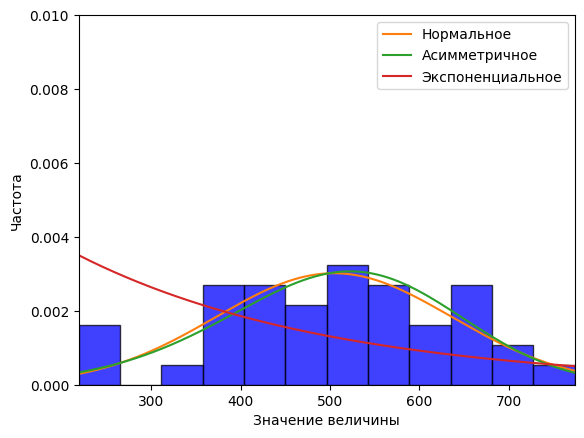

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mean = 500
std_dev = 150
# Ваши данные
m = np.random.normal(loc=mean, scale=std_dev, size=40).astype(int)

samples = np.array(m)

# Параметры нормального распределения
mean = np.mean(samples)
std = np.sqrt(np.var(samples))

# Параметры асимметричного нормального распределения
skew_params = stats.skewnorm.fit(samples)

# Экспоненциальное распределение
exp_params = stats.expon.fit(samples)

# Создаем массив значений для графика
x = np.linspace(min(samples), max(samples), 1000)

# Плотности распределений
y_norm_pdf = stats.norm.pdf(x, mean, std)
y_skew_pdf = stats.skewnorm.pdf(x, *skew_params)
y_exp_pdf = stats.expon.pdf(x, *exp_params)

# Строим гистограмму
n, bins, patches = plt.hist(samples, bins=12, density=True, facecolor='b', edgecolor='black', alpha=0.75)

# Строим графики распределений
l1, = plt.plot(x, y_norm_pdf, label='Нормальное распределение')
l2, = plt.plot(x, y_skew_pdf, label='Асимметричное нормальное распределение')
l3, = plt.plot(x, y_exp_pdf, label='Экспоненциальное распределение')

# Настройки графика
plt.xlabel('Значение величины')
plt.ylabel('Частота')
plt.legend((l1, l2, l3), ('Нормальное', 'Асимметричное', 'Экспоненциальное'), loc='upper right')
plt.axis([min(samples), max(samples), 0, 0.01])
plt.show()


## Проверка гипотез с помощью критерия хи-квадрат


In [9]:
# Ожидаемые частоты для каждого распределения
expected_norm = stats.norm.pdf(bins, mean, std) * len(samples)
expected_skew = stats.skewnorm.pdf(bins, *skew_params) * len(samples)
expected_exp = stats.expon.pdf(bins, *exp_params) * len(samples)

chi2_stat_norm, p_value_norm = stats.chisquare( expected_norm)
chi2_stat_skew, p_value_skew = stats.chisquare(expected_skew)
chi2_stat_exp, p_value_exp = stats.chisquare(expected_exp)

# Вывод результатов
print("Нормальное распределение:")
print("Хи-квадрат статистика:", chi2_stat_norm)
print("p-значение:", p_value_norm)

print("\nАсимметричное нормальное распределение:")
print("Хи-квадрат статистика:", chi2_stat_skew)
print("p-значение:", p_value_skew)

print("\nЭкспоненциальное распределение:")
print("Хи-квадрат статистика:", chi2_stat_exp)
print("p-значение:", p_value_exp)


Нормальное распределение:
Хи-квадрат статистика: 0.2882035762905046
p-значение: 0.9999999890071315

Асимметричное нормальное распределение:
Хи-квадрат статистика: 0.29936997349468597
p-значение: 0.9999999862566873

Экспоненциальное распределение:
Хи-квадрат статистика: 0.2813866359588565
p-значение: 0.999999990450048


## Функция для проверки гипотезы о законе распределения случайной величины с помощью критерия Колмогорова- Смирнова

In [10]:
# Генерируем выборку для теста Колмогорова-Смирнова
norm_samples = np.random.normal(np.mean(samples), np.std(samples), 1000)

# Критерий Колмогорова-Смирнова для нормального распределения
ks_stat_norm, p_value_norm = stats.ks_2samp(samples, norm_samples)

# Критерий Колмогорова-Смирнова для асимметричного нормального распределения
skew_params = stats.skewnorm.fit(samples)
skew_samples = stats.skewnorm.rvs(*skew_params, size=1000)
ks_stat_skew, p_value_skew = stats.ks_2samp(samples, skew_samples)

# Критерий Колмогорова-Смирнова для экспоненциального распределения
exp_params = stats.expon.fit(samples)
exp_samples = stats.expon.rvs(*exp_params, size=1000)
ks_stat_exp, p_value_exp = stats.ks_2samp(samples, exp_samples)

# Вывод результатов
print(f'Статистика и p-значение для нормального распределения: {ks_stat_norm}, {p_value_norm}')
print(f'Статистика и p-значение для асимметричного распределения: {ks_stat_skew}, {p_value_skew}')
print(f'Статистика и p-значение для экспоненциального распределения: {ks_stat_exp}, {p_value_exp}')

Статистика и p-значение для нормального распределения: 0.091, 0.8816696310951855
Статистика и p-значение для асимметричного распределения: 0.107, 0.7340552074996834
Статистика и p-значение для экспоненциального распределения: 0.295, 0.0018809627862564713
